# 문제 1

분류 평가지표 중 하나인 'F1 스코어'에 대해 설명하세요.

답: 정밀도와 재현율을 결합한 지표로 (2 * 정밀도 * 재현율) / (정밀도 + 재현율)로 구할 수 있다. 

# 문제 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import Binarizer

첨부파일 'winequality-red.csv'를 불러와서 변수(wine)에 할당하세요.

In [2]:
wine = pd.read_csv('C:/Users/USER/BITAmin/data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 데이터셋 설명

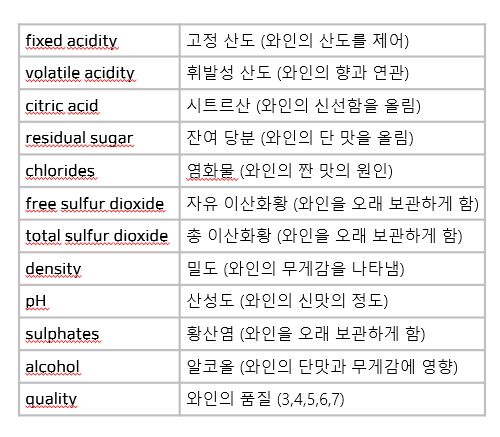

2-1 quality 컬럼의 값이 7 이상이면 1로, 7보다 작으면 0으로 값을 변경해주세요.\
(새로운 컬럼을 만들지 않고, apply함수를 이용해 quality 컬럼의 값을 변경)

In [3]:
wine['quality'] = wine['quality'].apply(lambda x: 1 if x>=7 else 0)
wine['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

2-2 StandardScaler를 활용하여 Scaling을 진행한 후 전체 데이터를 학습 데이터셋과 테스트 데이터 셋으로 분리하세요.
- test_size = 0.2, random_state = 2

In [4]:
X = wine.drop(['quality'], axis = 1)
y = wine['quality']

In [5]:
# 스케일링
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [6]:
# 학습데이터/테스트데이터 분리
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=.2, random_state=2)

2-3 RandomForest를 활용하여 데이터를 학습, 예측시킨 후 오차행렬과 평가 지표(정확도, 정밀도, 재현율, F1)을 산출하세요.
- get_clf_eval 함수를 활용하세요.

In [7]:
# get_clf_eval() 함수 정의
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(ytest, pred)
    accuracy = accuracy_score(ytest, pred)
    precision = precision_score(ytest, pred)
    recall = recall_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(ytest, pred_proba)
    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nF1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [8]:
from sklearn.ensemble import RandomForestClassifier

# 학습
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)

# 예측
pred = rf.predict(Xtest)
pred_proba = rf.predict_proba(Xtest)[:,1]

# 평가
get_clf_eval(ytest, pred, pred_proba)

오차 행렬
 [[270   9]
 [ 17  24]]
정확도: 0.9187
정밀도: 0.7273
재현율: 0.5854
F1: 0.6486


2-4 주어진 임곗값에 따른 평가 지표(정확도, 정밀도, 재현율, F1)의 변화를 출력하고, 가장 적절한 임곗값과 그 이유를 설명하세요.
- thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]


In [9]:
# get_eval_by_threshold() 함수 정의
def get_eval_by_threshold(ytest, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값:', custom_threshold)
        get_clf_eval(ytest, custom_predict, pred_proba_c1)

In [10]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = rf.predict_proba(Xtest)
get_eval_by_threshold(ytest, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값: 0.4
오차 행렬
 [[265  14]
 [ 12  29]]
정확도: 0.9187
정밀도: 0.6744
재현율: 0.7073
F1: 0.6905

임계값: 0.45
오차 행렬
 [[266  13]
 [ 14  27]]
정확도: 0.9156
정밀도: 0.6750
재현율: 0.6585
F1: 0.6667

임계값: 0.5
오차 행렬
 [[270   9]
 [ 17  24]]
정확도: 0.9187
정밀도: 0.7273
재현율: 0.5854
F1: 0.6486

임계값: 0.55
오차 행렬
 [[273   6]
 [ 20  21]]
정확도: 0.9187
정밀도: 0.7778
재현율: 0.5122
F1: 0.6176

임계값: 0.6
오차 행렬
 [[277   2]
 [ 24  17]]
정확도: 0.9187
정밀도: 0.8947
재현율: 0.4146
F1: 0.5667


가장 적절한 임곗값을 적어주세요: 0.4

이유 설명: F1 스코어를 평가 기준으로 볼 때, 임곗값이 0.4일 때 가장 좋은(높은) F1 스코어 값을 가지기 때문이다.

2-5 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화하세요.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

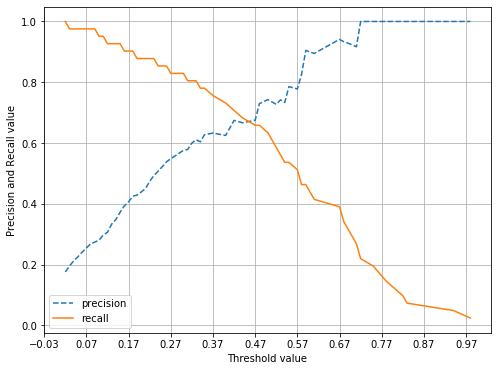

In [12]:
# precision_recall_curve_plot() 함수 정의
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold 값, y축을 정밀도, 재현율로 그리기
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: thresholds_boundary], linestyle= '--', label='precision')
    plt.plot(thresholds, recalls[0: thresholds_boundary], label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(ytest, rf.predict_proba(Xtest)[:,1])

# 문제 3

첨부파일 'Bank_Personal_Loan_Modelling.csv'를 불러와서 변수(loan)에 할당하세요.

In [13]:
loan = pd.read_csv('C:/Users/USER/BITAmin/data/Bank_Personal_Loan_Modelling.csv')
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 데이터셋 설명

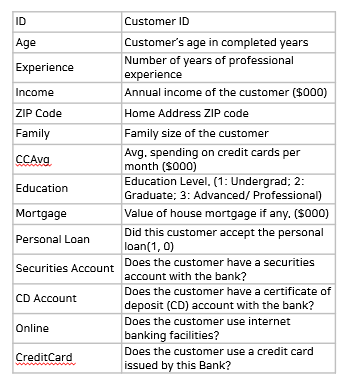

3-1 설명력이 없는 변수 (ID, ZIP Code)를 열에서 삭제하세요.

In [14]:
loan.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


3-2 StandardScaler를 활용하여 Scaling을 진행한 후 전체 데이터를 학습 데이터셋과 테스트 데이터 셋으로 분리하세요.
- test_size = 0.2, random_state = 2

In [15]:
X = loan.drop(['Personal Loan'], axis = 1)
y = loan['Personal Loan']

In [16]:
# 스케일링
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


In [17]:
# 학습데이터/테스트데이터 분리
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=.2, random_state=2)

3-3 DecisionTree, RandomForest, Logistic Regression을 활용하여 데이터를 학습, 예측시킨 후 오차행렬과 성능 평가 지표(정확도, 정밀도, 재현율, F1)을 산출하세요.
- get_clf_eval 함수를 활용하세요.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state = 73)
dt_clf.fit(Xtrain, ytrain)
dt_pred = dt_clf.predict(Xtest)
dt_pred_proba = dt_clf.predict_proba(Xtest)[:,1]

# RandomForest
rf_clf = RandomForestClassifier(random_state = 73)
rf_clf.fit(Xtrain, ytrain)
rf_pred = rf_clf.predict(Xtest)
rf_pred_proba = rf_clf.predict_proba(Xtest)[:,1]

# Logistic Regression
lr_clf = LogisticRegression()
lr_clf.fit(Xtrain, ytrain)
lr_pred = lr_clf.predict(Xtest)
lr_pred_proba = lr_clf.predict_proba(Xtest)[:,1]

In [20]:
# Decision Tree
print('\n#DecisionTreeClassifier')
get_clf_eval(ytest, dt_pred, dt_pred_proba)

# RandomForest
print('\n#RandomForestClassifier')
get_clf_eval(ytest, rf_pred, rf_pred_proba)

# Logistic Regression
print('\n#LogisticRegression')
get_clf_eval(ytest, lr_pred, lr_pred_proba)


#DecisionTreeClassifier
오차 행렬
 [[903   6]
 [ 12  79]]
정확도: 0.9820
정밀도: 0.9294
재현율: 0.8681
F1: 0.8977

#RandomForestClassifier
오차 행렬
 [[908   1]
 [ 12  79]]
정확도: 0.9870
정밀도: 0.9875
재현율: 0.8681
F1: 0.9240

#LogisticRegression
오차 행렬
 [[895  14]
 [ 39  52]]
정확도: 0.9470
정밀도: 0.7879
재현율: 0.5714
F1: 0.6624


3-4 어떤 모델의 성능이 가장 좋다고 할 수 있는지 이유와 함께 설명하세요.

답: RandomForest를 이용한 모델의 F1 스코어가 0.9240으로 가장 높으므로, 가장 좋은 모델이라고 판단할 수 있다.

3-5  가장 성능이 좋은 모델에 대한 ROC 곡선을 그리세요.

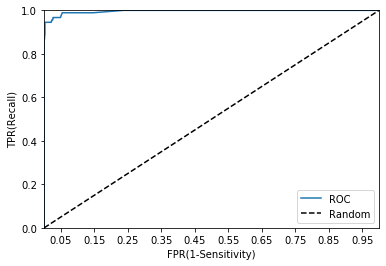

In [21]:
# roc_curve_plot() 함수 정의
def roc_curve_plot(y_test, pred_proba_c1):

    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(ytest, rf_pred_proba) 

3-6 가장 성능이 좋은 모델에 대한 AUC 값을 산출하세요.

In [22]:
roc_score = roc_auc_score(ytest, rf_pred)
print('ROC AUC 값 : {:.4f}'.format(roc_score))

ROC AUC 값 : 0.9335
